<a href="https://colab.research.google.com/github/DuarteMagano/Hello-Quantum-World/blob/main/tutorial_students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notice

In [128]:
# This notebook was tested for qiskit version 1.3.2 and qiskit-ibm-runtime version 0.35.0
# Be careful when running newer versions

# Quantum states

In [129]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector

## Defining States

In [130]:
u = Statevector([1/np.sqrt(2), 1/np.sqrt(2)])
v = Statevector([1, 0])
w = Statevector([1/3, 2/3])

states_arr = (u, v, w)

## Seeing states

In [131]:
u.draw()

'Statevector([0.70710678+0.j, 0.70710678+0.j],\n            dims=(2,))'

In [132]:
u.draw("latex")

<IPython.core.display.Latex object>

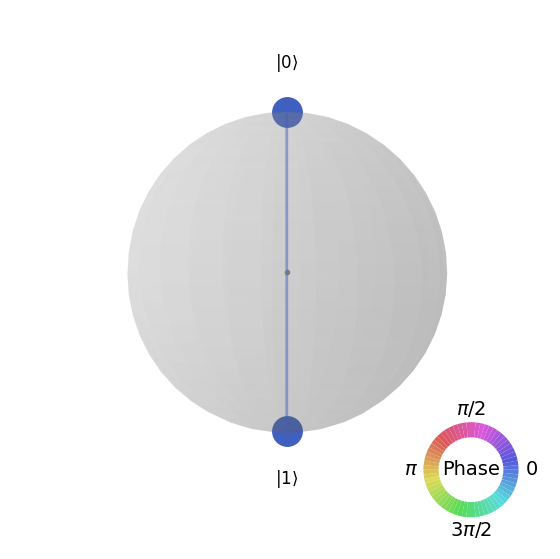

In [133]:
u.draw("qsphere")

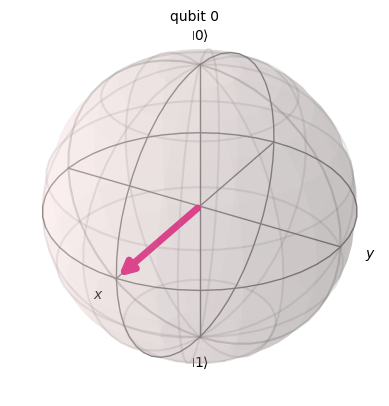

In [134]:
plot_bloch_multivector(u)

## Normalization

In [135]:
# Checking if states are normalized
for state in states_arr:
    print(f"Is {state} valid? {'Yes' if state.is_valid() else 'No'}")

Is Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,)) valid? Yes
Is Statevector([1.+0.j, 0.+0.j],
            dims=(2,)) valid? Yes
Is Statevector([0.33333333+0.j, 0.66666667+0.j],
            dims=(2,)) valid? No


## Measurements

In [136]:
# Making a measurement
for state in states_arr:
    try:
        outcome, state_collapsed = state.measure()
    except ValueError as e:
        print(f"Got error {e}")

    print(f"Measured {outcome} from state {state}!")

Measured 0 from state Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))!
Measured 0 from state Statevector([1.+0.j, 0.+0.j],
            dims=(2,))!
Got error probabilities do not sum to 1
Measured 0 from state Statevector([0.33333333+0.j, 0.66666667+0.j],
            dims=(2,))!


State Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,)):


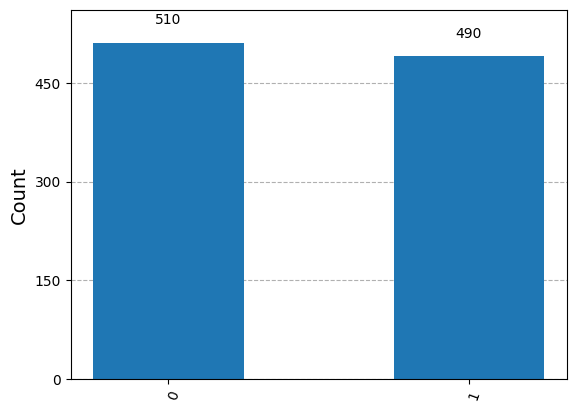

In [137]:
# Making a measurement
for state in states_arr[:1]:
    outcomes = state.sample_counts(1000)

    print(f"State {state}:")

plot_histogram(outcomes)

# Quantum operations

In [138]:
from qiskit.quantum_info import Operator
from qiskit.circuit.library import RXGate, CXGate

## Custom Gates

In [139]:
# create operator from explicit matrix representation

U = Operator(np.array([[0., 1.],
                       [1., 0.]]))

print(f"Our gate {'is unitary' if U.is_unitary() else 'is not unitary'}!")
print(f"Our gate acts on {U.num_qubits} qubits.")

print("Our gate is:")
U.draw("latex")

Our gate is unitary!
Our gate acts on 1 qubits.
Our gate is:


<IPython.core.display.Latex object>

## Standard Gates

In [140]:
for label in ("X", "Y", "Z", "S", "T", "H"):
  op = Operator.from_label(label)
  print(label + ":")
  display(op.draw("latex"))

X:


<IPython.core.display.Latex object>

Y:


<IPython.core.display.Latex object>

Z:


<IPython.core.display.Latex object>

S:


<IPython.core.display.Latex object>

T:


<IPython.core.display.Latex object>

H:


<IPython.core.display.Latex object>

In [141]:
from qiskit.circuit.library import RXGate

op = Operator(RXGate(np.pi/4))
op.draw("latex")

<IPython.core.display.Latex object>

In [142]:
from qiskit.circuit.library import standard_gates

print([gate for gate in dir(standard_gates) if not gate.startswith('_')])

['C3SXGate', 'C3XGate', 'C4XGate', 'CCXGate', 'CCZGate', 'CHGate', 'CPhaseGate', 'CRXGate', 'CRYGate', 'CRZGate', 'CSGate', 'CSXGate', 'CSdgGate', 'CSwapGate', 'CU1Gate', 'CU3Gate', 'CUGate', 'CXGate', 'CYGate', 'CZGate', 'DCXGate', 'ECRGate', 'GlobalPhaseGate', 'HGate', 'IGate', 'MCPhaseGate', 'MCU1Gate', 'MCXGate', 'MCXGrayCode', 'MCXRecursive', 'MCXVChain', 'PhaseGate', 'RC3XGate', 'RCCXGate', 'RGate', 'RXGate', 'RXXGate', 'RYGate', 'RYYGate', 'RZGate', 'RZXGate', 'RZZGate', 'SGate', 'SXGate', 'SXdgGate', 'SdgGate', 'SwapGate', 'TGate', 'TdgGate', 'U1Gate', 'U2Gate', 'U3Gate', 'UGate', 'XGate', 'XXMinusYYGate', 'XXPlusYYGate', 'YGate', 'ZGate', 'dcx', 'ecr', 'equivalence_library', 'get_standard_gate_name_mapping', 'global_phase', 'h', 'i', 'iSwapGate', 'iswap', 'mcrx', 'mcry', 'mcrz', 'multi_control_rotation_gates', 'p', 'r', 'rx', 'rxx', 'ry', 'ryy', 'rz', 'rzx', 'rzz', 's', 'swap', 'sx', 't', 'u', 'u1', 'u2', 'u3', 'x', 'xx_minus_yy', 'xx_plus_yy', 'y', 'z']


# Quantum circuits

In [143]:
from qiskit import QuantumCircuit

## First Circuit

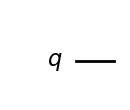

In [144]:
# Make a 1-qubit measurement
qc = QuantumCircuit(1)
qc.draw('mpl')

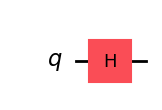

In [145]:
# Add an H gate
qc.h(0)
qc.draw('mpl')

In [146]:
# Calculate state at end of circuit
state = Statevector(qc)
state.draw("latex")

<IPython.core.display.Latex object>

# Sampler primitive

In [147]:
from qiskit.primitives import StatevectorSampler
from qiskit import QuantumRegister, ClassicalRegister

## Simulating a Circuit

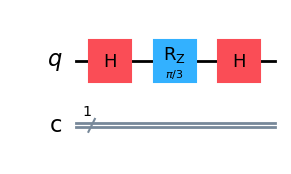

In [148]:
# Make a circuit with one qubit and a bit
creg = ClassicalRegister(1, 'c')
qreg = QuantumRegister(1, 'q')

qc = QuantumCircuit(qreg, creg)

qc.h(qreg)
qc.rz(np.pi / 3, qreg)
qc.h(qreg)

qc.draw('mpl')

In [149]:
# Estimate state vector at the end
state = Statevector(qc)
state.draw("latex")

<IPython.core.display.Latex object>

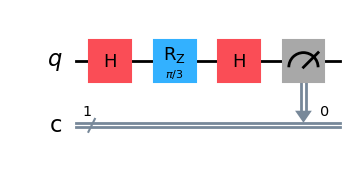

In [150]:
# Adding a measurement
qc.measure(qreg, creg)
qc.draw("mpl")

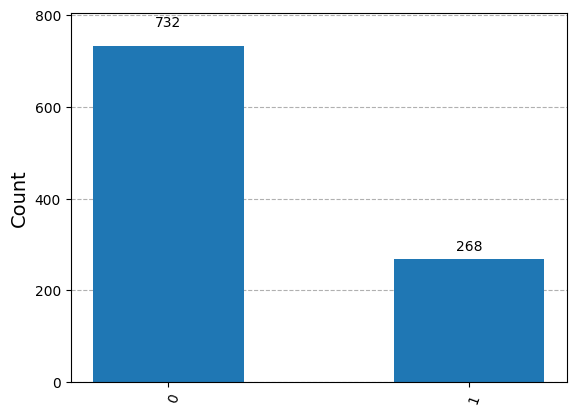

In [151]:
# Making a simulation, using a sampler
sampler = StatevectorSampler()

# Running the job
job = sampler.run([qc], shots=1000)

# The "0" index is because we can run more than one circuit
results = job.result()[0] 

# The "c" attribute is named after the classical register
counts = results.data.c.get_counts()

# Plot the results
plot_histogram(counts)

## Parametrized Circuits

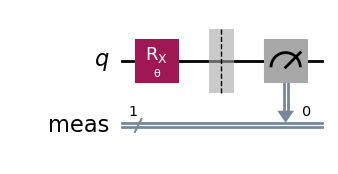

In [152]:
from qiskit.circuit import Parameter

theta = Parameter('θ')

qc = QuantumCircuit(1)
qc.rx(theta, 0)
qc.measure_all()

qc.draw("mpl")

In [153]:
# We can feed a sampler a list of values for the free parameter
values = np.linspace(0, 2*np.pi, 50)
job = sampler.run([(qc, values)], shots = 1000)

# Get the results
results = job.result()[0]
global_counts = [count.get_counts() for count in results.data.meas]

# View the results
plt.plot(values, [counts['0'] for counts in global_counts])
plt.xlabel(r"$theta$")
plt.ylabel(r"P[$0$]")
plt.title("Counts of $0$ ")

KeyError: '0'

# Multiple qubits

## States

In [ ]:
state = Statevector.from_label('00')
state.draw("latex")

<IPython.core.display.Latex object>

In [ ]:
state = Statevector.from_int(1, dims=2**2)
state.draw("latex")

<IPython.core.display.Latex object>

In [ ]:
state = Statevector([1 / 2, 0, 0, 1 / 2])
state.draw("latex")

<IPython.core.display.Latex object>

In [ ]:
XX = Operator.from_label("XX")

XX.draw("latex")

<IPython.core.display.Latex object>

In [ ]:
XX.num_qubits

2

## Quantum Circuits

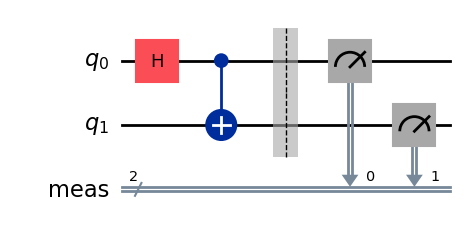

In [163]:
qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0, 1)
qc.measure_all()

qc.draw('mpl')

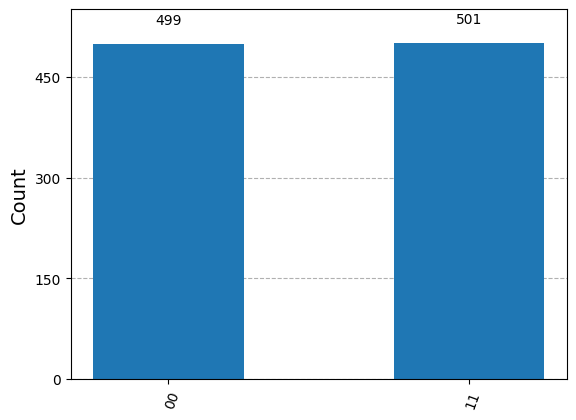

In [164]:
# Create the sampler
sampler = StatevectorSampler()

# Run the job
job = sampler.run([qc], shots=1000)
results = job.result()[0] 

# The name "meas" is the default name for the classical register
counts = results.data.meas.get_counts()

# Plot
plot_histogram(counts)

# Qiskit runtime

In [165]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

## Setting up the Connection

In [ ]:
TOKEN = "see_IMB_QUANTUM"
service = QiskitRuntimeService(channel="ibm_quantum", token=TOKEN)

In [167]:
# Choose a real quantum computer, which is not busy
backend = service.least_busy(operational=True, simulator=False)
print(f"{backend.name =}, {backend.num_qubits = }")

backend.name ='ibm_kyiv', backend.num_qubits = 127


In [168]:
# Choose the system that adapts our circuit to the backend
pass_manager = generate_preset_pass_manager(
    backend=backend,
    optimization_level=1
)

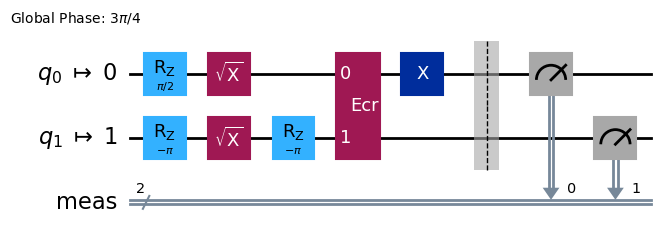

In [169]:
# Transpile circuit into the native gates of the quantum computer
isa_qc = pass_manager.run(qc)
isa_qc.draw('mpl', idle_wires=False)

In [170]:
# How to sample the final result
sampler = SamplerV2(backend)

In [171]:
# Run the job with the transpiled circuit
job = sampler.run([isa_qc], shots=128)
job.job_id()

'cz86c8h4spc00086hvv0'

In [174]:
# See if the job has finished or not
job.status()

'DONE'

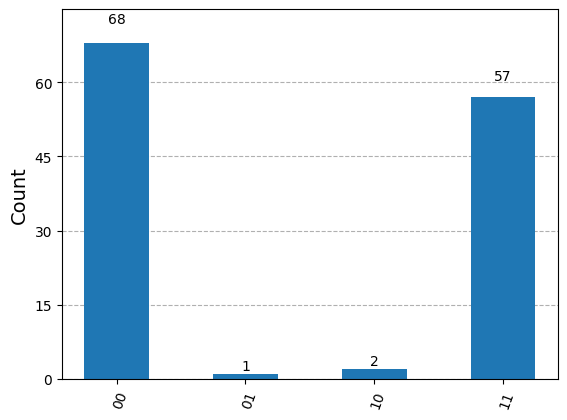

In [177]:
# Get and plot the results
results = job.result()[0]
counts = results.data.meas.get_counts()
plot_histogram(counts)

# Quantum machine learning

In [179]:
from scipy.optimize import minimize # SciPy minimizer routine

## Case 1

In [197]:
# True physical law
true_phase = 0.723

def true_model(x):
  global true_phase
  return np.cos(x + true_phase)

Text(0, 0.5, '$y(x)$')

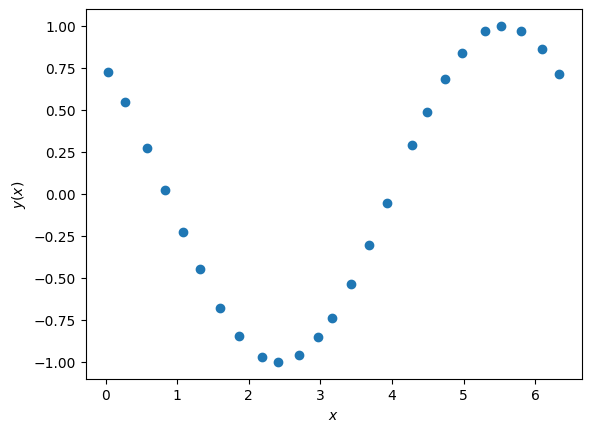

In [190]:
# Training data
x_train = np.linspace(0, 2*np.pi, 25) + 0.1 * np.random.rand(25)
y_train = [true_model(x) for x in x_train]

plt.scatter(x_train, y_train)
plt.xlabel(r"$x$")
plt.ylabel(r"$y(x)$")

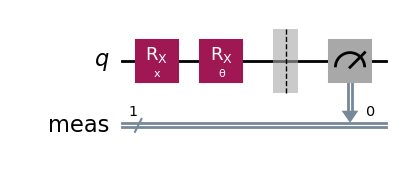

In [191]:
# Quantum Neural Network
x = Parameter('x')
theta = Parameter('θ')

ansatz = QuantumCircuit(1)
ansatz.rx(x, 0)
ansatz.rx(theta, 0)
ansatz.measure_all()

# Our predictor is this quantity, which gives us a cosine function for this setup, with initial phase equal to theta
# That is, we chose our neural network such that its output has a shape that is similar to the data
def predictor(counts):
    return (counts.get('0', 0) - counts.get('1', 0))  / (counts.get('0', 0) + counts.get('1', 0))

ansatz.draw("mpl")

### Untrained Predictions

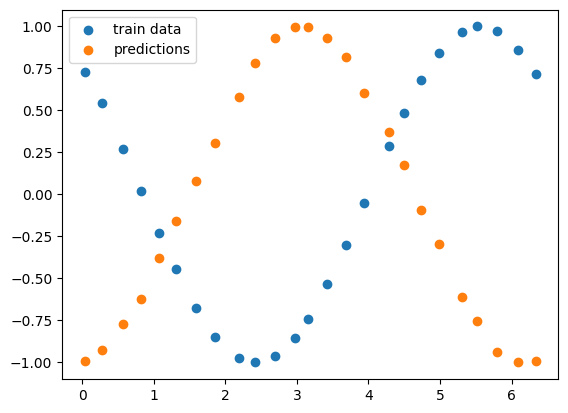

In [192]:
# Untrained predictions (random parameter)
sampler = StatevectorSampler()
NSHOTS = 1024

theta = 2*np.pi * np.random.rand()
parameter_values = [[x, theta] for x in x_train]

job = sampler.run([(ansatz, parameter_values)], shots = NSHOTS)
global_counts = [data.get_counts() for data in job.result()[0].data.meas]

y_pred = [predictor(counts) for counts in global_counts]

plt.scatter(x_train, y_train, label = "train data")
plt.scatter(x_train, y_pred, label = "predictions")
plt.legend()

### Cost Function

In [193]:
cost_history = {
    "prev_value": None,
    "iters": 0,
    "cost": [],
}


# Define a cost function for this learning process
def cost_func(params, ansatz):

    circuit_params = np.array([[x, params[0]] for x in x_train]) # params is an array with a single value for theta
    job = sampler.run([(ansatz, circuit_params)], shots = NSHOTS)
    global_counts = [data.get_counts() for data in job.result()[0].data.meas]
    y_pred = np.array([predictor(counts) for counts in global_counts])

    cost = np.mean((y_train - y_pred)**2)

    cost_history["iters"] += 1
    cost_history["prev_vector"] = params
    cost_history["cost"].append(cost)
    print(f"Iters. done: {cost_history['iters']} [Current cost: {cost}]")

    return cost

### Training Process

In [194]:
params_init = 2 * np.pi * np.random.random(1)

res = minimize(
    cost_func,
    params_init,
    args=(ansatz),
    method="cobyla",
    options = {"maxiter" : 300}
)

Iters. done: 1 [Current cost: 0.23201730311066324]
Iters. done: 2 [Current cost: 1.1712539071846424]
Iters. done: 3 [Current cost: 0.04792520818169513]
Iters. done: 4 [Current cost: 0.7054195143107728]
Iters. done: 5 [Current cost: 0.29744934897895947]
Iters. done: 6 [Current cost: 0.0018110057705347318]
Iters. done: 7 [Current cost: 0.024007713955359958]
Iters. done: 8 [Current cost: 0.0023811577574420735]
Iters. done: 9 [Current cost: 0.005836467621936506]
Iters. done: 10 [Current cost: 0.0009877139645573763]
Iters. done: 11 [Current cost: 0.0004281005047868723]
Iters. done: 12 [Current cost: 0.0012328309769356382]
Iters. done: 13 [Current cost: 0.000988041883974547]
Iters. done: 14 [Current cost: 0.0004110292693886615]
Iters. done: 15 [Current cost: 0.0004555107645080635]
Iters. done: 16 [Current cost: 0.0003687910791034076]
Iters. done: 17 [Current cost: 0.000559854199533413]
Iters. done: 18 [Current cost: 0.0007035599788176349]
Iters. done: 19 [Current cost: 0.000558553081151146]


### Results of the Training

Text(0, 0.5, 'MSE loss')

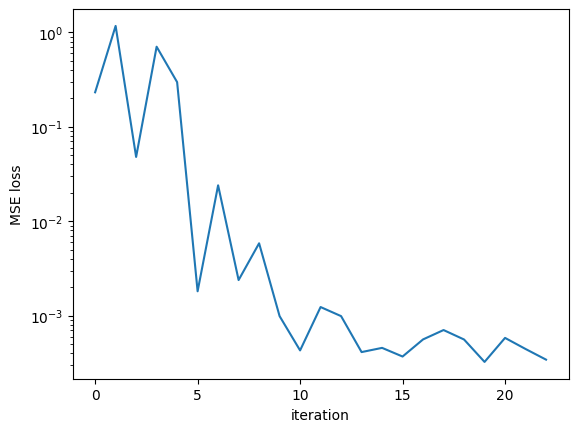

In [195]:
plt.semilogy(cost_history["cost"])
plt.xlabel("iteration")
plt.ylabel("MSE loss")

In [198]:
learned_phase = cost_history["prev_vector"][-1]

print(f"The real parameter is {true_phase} and the learned phase is {learned_phase} which is a difference of {abs(true_phase - learned_phase)}!")

The real parameter is 0.723 and the learned phase is 0.7248357933620624 which is a difference of 0.00183579336206241!


## Case 2

In [199]:
# True physical law
true_freq = 0.37

def true_model(x):
  global true_freq
  return np.cos(true_freq * x)

Text(0, 0.5, '$y(x)$')

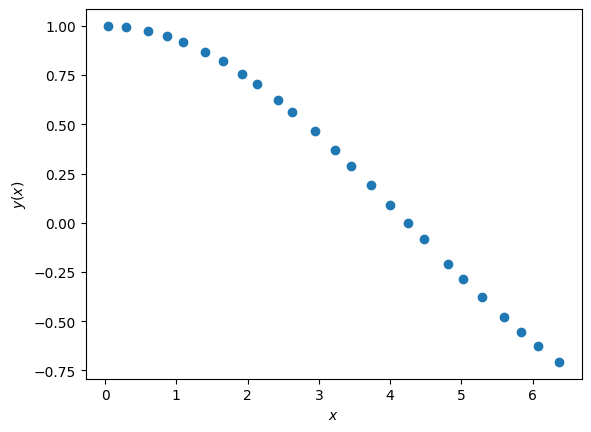

In [200]:
# Training data
x_train = np.linspace(0, 2*np.pi, 25) + 0.1 * np.random.rand(25)
y_train = [true_model(x) for x in x_train]

plt.scatter(x_train, y_train)
plt.xlabel(r"$x$")
plt.ylabel(r"$y(x)$")

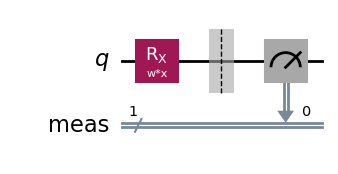

In [201]:
# Quantum Neural Network
x = Parameter('x')
w = Parameter('w')

# This is a similar NN as the one above, but know we put a frequency next to the x-rotation.
ansatz = QuantumCircuit(1)
ansatz.rx(x * w, 0)
ansatz.measure_all()

# Our predictor is this quantity, which gives us a cosine function for this setup, with initial phase equal to theta
# That is, we chose our neural network such that its output has a shape that is similar to the data
def predictor(counts):
    return (counts.get('0', 0) - counts.get('1', 0))  / (counts.get('0', 0) + counts.get('1', 0))

ansatz.draw("mpl")

### Untrained Predictions

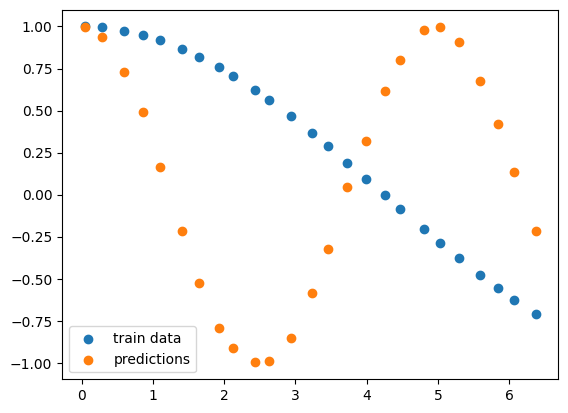

In [202]:
# Untrained predictions (random parameter)
sampler = StatevectorSampler()
NSHOTS = 1024

theta = 2*np.pi * np.random.rand()
parameter_values = [[x, theta] for x in x_train]

job = sampler.run([(ansatz, parameter_values)], shots = NSHOTS)
global_counts = [data.get_counts() for data in job.result()[0].data.meas]

y_pred = [predictor(counts) for counts in global_counts]

plt.scatter(x_train, y_train, label = "train data")
plt.scatter(x_train, y_pred, label = "predictions")
plt.legend()

### Cost Function

In [203]:
cost_history = {
    "prev_value": None,
    "iters": 0,
    "cost": [],
}


# Define a cost function for this learning process
def cost_func(params, ansatz):

    circuit_params = np.array([[x, params[0]] for x in x_train]) # params is an array with a single value for theta
    job = sampler.run([(ansatz, circuit_params)], shots = NSHOTS)
    global_counts = [data.get_counts() for data in job.result()[0].data.meas]
    y_pred = np.array([predictor(counts) for counts in global_counts])

    cost = np.mean((y_train - y_pred)**2)

    cost_history["iters"] += 1
    cost_history["prev_vector"] = params
    cost_history["cost"].append(cost)
    print(f"Iters. done: {cost_history['iters']} [Current cost: {cost}]")

    return cost

### Training Process

In [204]:
params_init = 2 * np.pi * np.random.random(1)

res = minimize(
    cost_func,
    params_init,
    args=(ansatz),
    method="cobyla",
    options = {"maxiter" : 300}
)

Iters. done: 1 [Current cost: 0.8838435483575554]
Iters. done: 2 [Current cost: 0.8890050867842936]
Iters. done: 3 [Current cost: 0.9253173404145677]
Iters. done: 4 [Current cost: 0.833932191535877]
Iters. done: 5 [Current cost: 0.9161025491705115]
Iters. done: 6 [Current cost: 0.898043984085387]
Iters. done: 7 [Current cost: 0.8955543021318674]
Iters. done: 8 [Current cost: 0.8367636500392027]
Iters. done: 9 [Current cost: 0.8361982603888104]
Iters. done: 10 [Current cost: 0.819498488457025]
Iters. done: 11 [Current cost: 0.8368712822241479]
Iters. done: 12 [Current cost: 0.8162215695022281]
Iters. done: 13 [Current cost: 0.8371955002958194]
Iters. done: 14 [Current cost: 0.8205439995698598]
Iters. done: 15 [Current cost: 0.830461523495604]
Iters. done: 16 [Current cost: 0.8338440659422287]
Iters. done: 17 [Current cost: 0.8295525573926148]
Iters. done: 18 [Current cost: 0.8283938931501258]
Iters. done: 19 [Current cost: 0.8185220032545275]
Iters. done: 20 [Current cost: 0.82413346812

### Results of the Training

Text(0, 0.5, 'MSE loss')

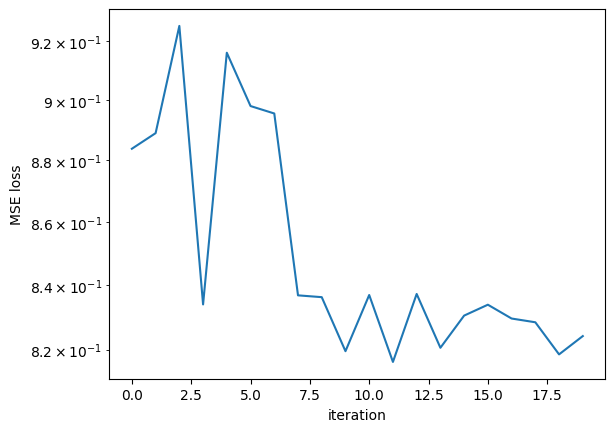

In [205]:
plt.semilogy(cost_history["cost"])
plt.xlabel("iteration")
plt.ylabel("MSE loss")

In [207]:
learned_freq = cost_history["prev_vector"][-1]

print(f"The real parameter is {true_freq} and the learned phase is {learned_freq} which is a difference of {abs(true_phase - learned_phase)}!")

The real parameter is 0.37 and the learned phase is 4.661517889400733 which is a difference of 3.9385178894007336!


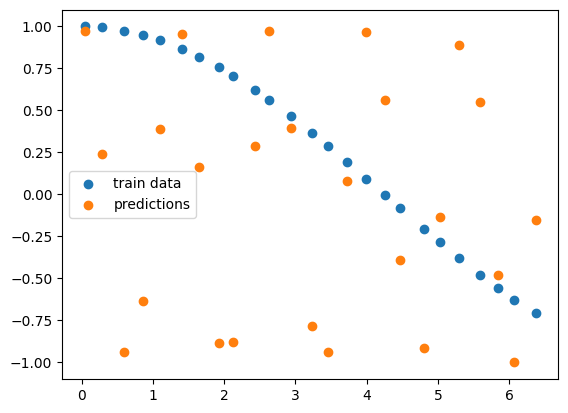

In [208]:
# Plotting with the learned frequency
w = learned_freq
parameter_values = [[x, w] for x in x_train]

job = sampler.run([(ansatz, parameter_values)], shots = NSHOTS)
global_counts = [data.get_counts() for data in job.result()[0].data.meas]

y_pred = [predictor(counts) for counts in global_counts]

plt.scatter(x_train, y_train, label = "train data")
plt.scatter(x_train, y_pred, label = "predictions")
plt.legend()

### Parameter Landscape

We can see that the parameter landscape has a lot of local minima, in which the model can get stuck!

Text(0, 0.5, 'cost function')

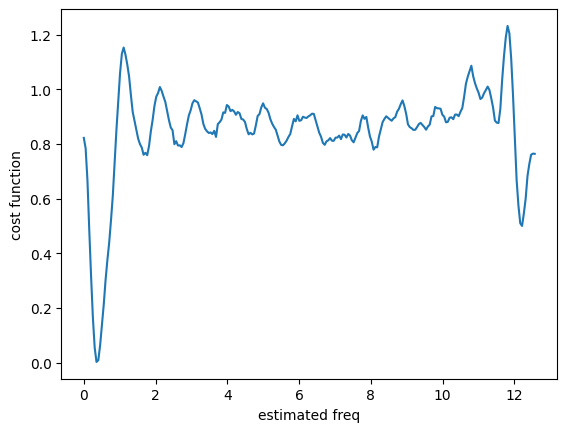

In [209]:
def model(params, ansatz):

    circuit_params = np.array([[params[0], x] for x in x_train]) # params is an array with a single value for w
    job = sampler.run([(ansatz, circuit_params)], shots = NSHOTS)
    global_counts = [data.get_counts() for data in job.result()[0].data.meas]
    y_pred = np.array([predictor(counts) for counts in global_counts])

    cost = np.mean((y_train - y_pred)**2)

    return cost

param_space = np.linspace(0, 4*np.pi, 250)
landscape = [model(np.array([param]), ansatz) for param in param_space]

plt.plot(param_space, landscape)
plt.xlabel("estimated freq")
plt.ylabel("cost function")

# Variational quantum eigensolver

The idea is to use the variational principle to minimize the average value of the Hamiltonian for a given wave function, which allows us to find the best trial wave function for the ground state of the corresponding systemm, which is the one that minimizes the energy.

Therefore, we just want to minimize a function!

In [210]:
from qiskit.circuit.library import EfficientSU2
from qiskit.primitives import StatevectorEstimator
from qiskit.quantum_info import SparsePauliOp

from scipy.optimize import minimize # SciPy minimizer routine
from scipy.linalg import eigh

import matplotlib.pyplot as plt

## Hamiltonians

There is no procedure to measure the average energy of any Hamiltonian, but we can get the average value of any Hamiltonian which is a linear combination of the operators $X$, $Y$ and $Z$.

For many qubit systems this conclusion also extends to the cases where we have different gates acting on the qubits at the same time (that is, when we have gates that are tensor products of $X$, $Y$ and $Z$).

In [221]:
hamiltonian = SparsePauliOp.from_list(
    [("YZ", 0.45), ("ZI", -1.2), ("ZZ", 1.45) , ("XX", -0.99)]
)
hamiltonian.to_operator().draw("text")

[[ 0.25+0.j  , 0.  +0.j  , 0.  -0.45j,-0.99+0.j  ],
 [ 0.  +0.j  ,-2.65+0.j  ,-0.99+0.j  , 0.  +0.45j],
 [ 0.  +0.45j,-0.99+0.j  ,-0.25+0.j  , 0.  +0.j  ],
 [-0.99+0.j  , 0.  -0.45j, 0.  +0.j  , 2.65+0.j  ]]

## Variational Method

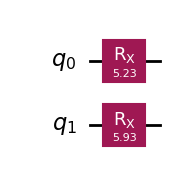

In [222]:
ansatz = QuantumCircuit(2)

phi1 = 2*np.pi*np.random.rand()
phi2 = 2*np.pi*np.random.rand()

ansatz.rx(phi1, 0)
ansatz.rx(phi2, 1)

ansatz.draw("mpl")

In [223]:
state = Statevector(ansatz)

# Determine the Hamiltonian
H = hamiltonian.to_operator().data
psi = state.data

# Measure average energy
exp_value = psi.transpose().conjugate() @ H @ psi

exp_value

(-0.3751518365227775+0j)

In [224]:
sampler = StatevectorSampler()
NSHOTS = 10024

def exp_Z0(counts):
  num = counts.get('00', 0) + counts.get('10', 0) - counts.get('01', 0) - counts.get('11', 0)
  den = counts.get('00', 0) + counts.get('11', 0) + counts.get('01', 0) + counts.get('10', 0)
  return num / den

def exp_ZZ(counts):
  num = counts.get('00', 0) + counts.get('11', 0) - counts.get('01', 0) - counts.get('10', 0)
  den = counts.get('00', 0) + counts.get('11', 0) + counts.get('01', 0) + counts.get('10', 0)
  return num / den

energy = 0.0


# YZ term
qc = QuantumCircuit(2)
qc.rx(phi1, 0)
qc.rx(phi2, 1)
qc.rx(-np.pi/2, 0)
qc.measure_all()
job = sampler.run([qc], shots=NSHOTS)
results = job.result()[0]
counts = results.data.meas.get_counts()
energy += hamiltonian.coeffs[0] * exp_ZZ(counts)

# ZI term
qc = QuantumCircuit(2)
qc.rx(phi1, 0)
qc.rx(phi2, 1)
qc.measure_all()
job = sampler.run([qc], shots=NSHOTS)
results = job.result()[0]
counts = results.data.meas.get_counts()
energy += hamiltonian.coeffs[1] * exp_Z0(counts)

# ZZ term
qc = QuantumCircuit(2)
qc.rx(phi1, 0)
qc.rx(phi2, 1)
qc.measure_all()
job = sampler.run([qc], shots=NSHOTS)
results = job.result()[0]
counts = results.data.meas.get_counts()
energy += hamiltonian.coeffs[2] * exp_ZZ(counts)

# XX term
qc = QuantumCircuit(2)
qc.rx(phi1, 0)
qc.rx(phi2, 1)
qc.ry(np.pi/2, 0)
qc.ry(np.pi/2, 1)
qc.measure_all()
job = sampler.run([qc], shots=NSHOTS)
results = job.result()[0]
counts = results.data.meas.get_counts()
energy += hamiltonian.coeffs[3] * exp_ZZ(counts)

print(f"The energy of the trial ground state wave function is {energy}.")


The energy of the trial ground state wave function is (-0.28170391061452515+0j).


## Better Variational Method

Now we pick a much larger neural network, with many more parameters, such that we can get a better estimation of the ground state energy.

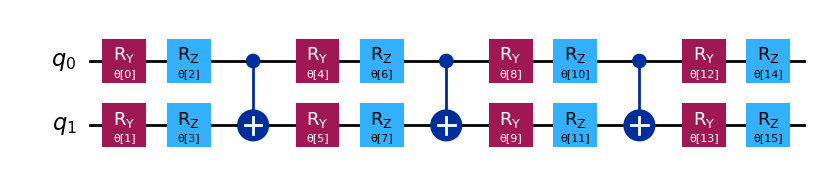

In [225]:
ansatz = EfficientSU2(hamiltonian.num_qubits)
ansatz.decompose().draw("mpl")

In [ ]:
params_list = list(ansatz.parameters)
num_params = ansatz.num_parameters
print(f"{num_params = }")

[ParameterVectorElement(θ[0]), ParameterVectorElement(θ[1]), ParameterVectorElement(θ[2]), ParameterVectorElement(θ[3]), ParameterVectorElement(θ[4]), ParameterVectorElement(θ[5]), ParameterVectorElement(θ[6]), ParameterVectorElement(θ[7]), ParameterVectorElement(θ[8]), ParameterVectorElement(θ[9]), ParameterVectorElement(θ[10]), ParameterVectorElement(θ[11]), ParameterVectorElement(θ[12]), ParameterVectorElement(θ[13]), ParameterVectorElement(θ[14]), ParameterVectorElement(θ[15])]
num_params = 16


In [228]:
estimator = StatevectorEstimator()

init_params = 2 * np.pi * np.random.random(num_params)

job = estimator.run([(ansatz, [hamiltonian], init_params)])

result = job.result()[0]
ev = result.data.evs.item()
print(f"<state|H|state> = {ev:.4f}\n")

result = job.result()[0]
ev = result.data.evs.item()
print(f"<state|H|state> = {ev:.4f}\n")

<state|H|state> = 0.1370

<state|H|state> = 0.1370



### Training

In [229]:
cost_history = {
    "prev_vector": None,
    "iters": 0,
    "energy": [],
}

def cost_func(params, ansatz, hamiltonian, estimator):

    job = estimator.run([(ansatz, [hamiltonian], params)])
    result = job.result()[0]
    energy = result.data.evs.item()

    cost_history["iters"] += 1
    cost_history["prev_vector"] = params
    cost_history["energy"].append(energy)
    print(f"Iters. done: {cost_history['iters']} [Current cost: {energy}]")

    return energy

In [230]:
params_init = 2 * np.pi * np.random.random(num_params)

res = minimize(
      cost_func,
      params_init,
      args=(ansatz, hamiltonian, estimator),
      method="cobyla",
      options = {"maxiter" : 300}
  )

Iters. done: 1 [Current cost: 0.027016995055010207]
Iters. done: 2 [Current cost: -0.6613307676245019]
Iters. done: 3 [Current cost: -1.3975598112737178]
Iters. done: 4 [Current cost: -1.0596920836744652]
Iters. done: 5 [Current cost: -1.2943257527522896]
Iters. done: 6 [Current cost: -1.3649077718805198]
Iters. done: 7 [Current cost: -1.5283844891361738]
Iters. done: 8 [Current cost: -1.0631626724301362]
Iters. done: 9 [Current cost: -1.3301121732064831]
Iters. done: 10 [Current cost: -1.9043454654990717]
Iters. done: 11 [Current cost: -0.9981950776779113]
Iters. done: 12 [Current cost: -2.0179420950104174]
Iters. done: 13 [Current cost: -1.8077429190353709]
Iters. done: 14 [Current cost: -1.414618554691987]
Iters. done: 15 [Current cost: -2.2151394414661034]
Iters. done: 16 [Current cost: -2.0748841389366652]
Iters. done: 17 [Current cost: -2.4748681548127958]
Iters. done: 18 [Current cost: -1.7248519879978408]
Iters. done: 19 [Current cost: -2.6272429598173574]
Iters. done: 20 [Curr

### Training History

Text(0, 0.5, 'energy')

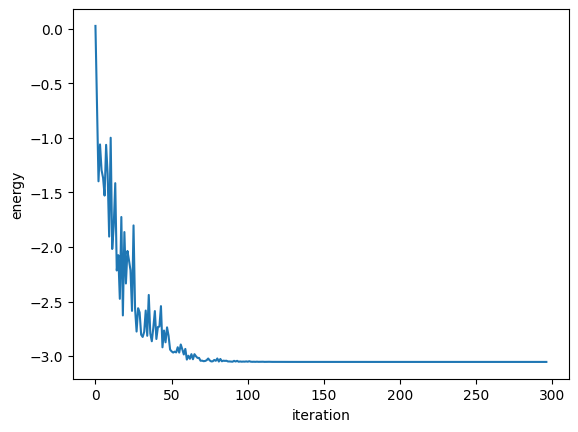

In [231]:
plt.plot(cost_history["energy"])
plt.xlabel("iteration")
plt.ylabel("energy")

In [233]:
values = cost_history["prev_vector"]
print(f"The trained parameters are: \n{values = }")

The trained parameters are: 
values = array([1.98716823, 2.01476958, 2.45950246, 1.53193443, 6.11837005,
       2.44871739, 4.34311845, 5.31399732, 2.52763202, 2.8651349 ,
       2.05963961, 2.25611712, 2.61058635, 1.86159188, 5.20716063,
       1.78082327])


### Trained Circuit

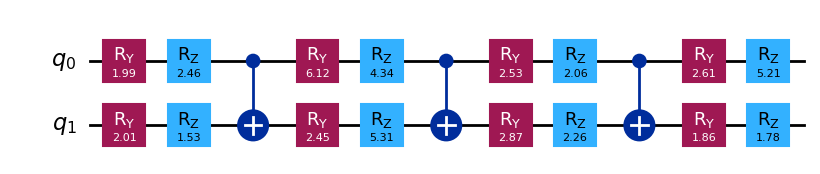

In [234]:
vqe_circuit = ansatz.assign_parameters(values)
vqe_circuit.decompose().draw("mpl")

In [235]:
vqe_ground_state = Statevector(vqe_circuit)
vqe_ground_energy = cost_history["energy"][-1]

print("\nVQE-estimated ground state:")
display(vqe_ground_state.draw("latex"))

print("\nVQE-estimated ground energy:")
print(vqe_ground_energy)


VQE-estimated ground state:


<IPython.core.display.Latex object>


VQE-estimated ground energy:
-3.0534698613836913


### Compare with Exact Result

In [236]:
matrix = hamiltonian.to_matrix()
exact_ground_energy, exact_ground_state = eigh(matrix, subset_by_index = [0, 0])

In [237]:
print("Exact ground state:")
display(Statevector(exact_ground_state).draw("latex"))
print("Exact ground energy:")
print(exact_ground_energy)

Exact ground state:


<IPython.core.display.Latex object>

Exact ground energy:
[-3.05346987]


In [238]:
for (vqe_amplitude, exact_amplitude) in zip(vqe_ground_state.data, exact_ground_state):
  phase = vqe_amplitude / exact_amplitude
  print(f"phase = {phase.item():.4f}")

phase = 0.7385+0.6741j
phase = 0.7385+0.6742j
phase = 0.7386+0.6742j
phase = 0.7387+0.6738j


### Conclusion

We can see that our result is the same as the exact ground state wave function, with only a phase factor difference!

Moreover, this is why on different runs we get different wave functions but all with the same energy (we get different global phases on our wave function).